# Proyek Ujian Tengah Semester "Analisis Time Series Penjualan Produk Cetakan"

# Penyiapan Data

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [32]:
# Load the Data
df = pd.read_csv('data_penjualan_produk_cetakan.csv', sep=';', index_col=False)
df.head()

,tanggal,Jenis Produk,sales,Harga,Total
0,05/08/2022,Foodpak260,1000,1800,1800000
1,05/08/2022,FoodpakMatte245,1000,1900,1900000
2,05/08/2022,CraftLaminasi290,5000,750,3750000
3,05/08/2022,CraftLaminasi290,1000,1200,1200000
4,07/08/2022,Dupleks310,1000,1550,1550000


# Pemrosesan Data

In [33]:
# Handle missing values
df = df.dropna()

# Assuming the correct column name for the date is 'date'
df['date'] = pd.to_datetime(df['tanggal'], format='%d/%m/%Y').dt.strftime('%Y-%m-%d')

# Convert date columns to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Set the date column as the index
df.set_index('date', inplace=True)

# Display the first few rows to verify
df.head()

,tanggal,Jenis Produk,sales,Harga,Total
date,,,,,
2022-08-05,05/08/2022,Foodpak260,1000,1800,1800000
2022-08-05,05/08/2022,FoodpakMatte245,1000,1900,1900000
2022-08-05,05/08/2022,CraftLaminasi290,5000,750,3750000
2022-08-05,05/08/2022,CraftLaminasi290,1000,1200,1200000
2022-08-07,07/08/2022,Dupleks310,1000,1550,1550000


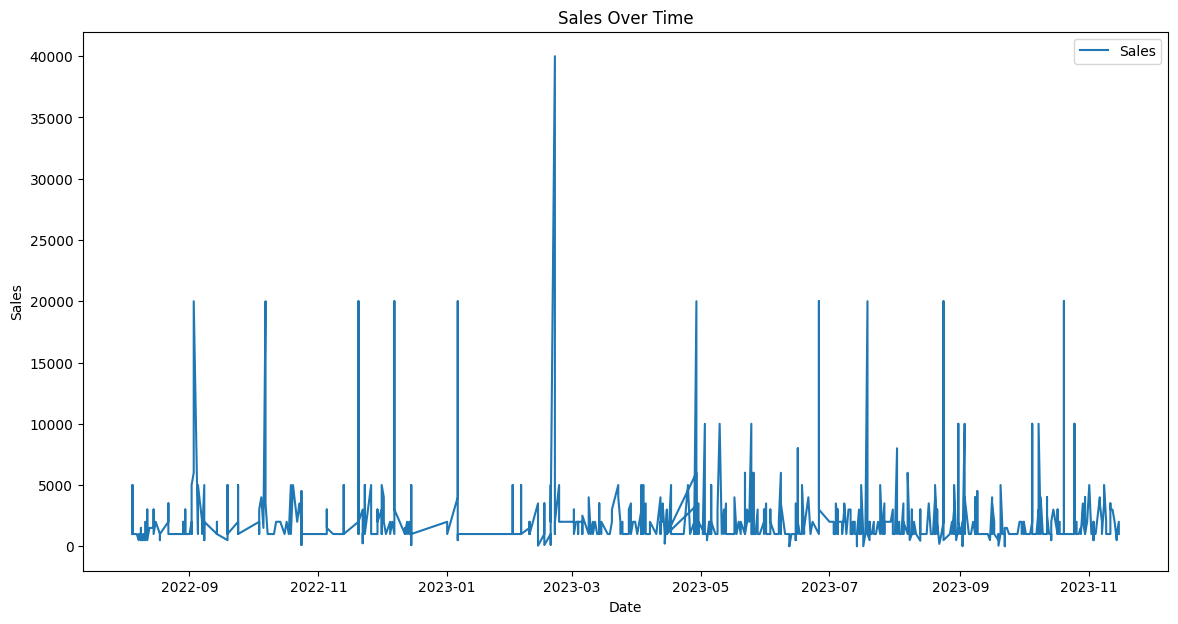

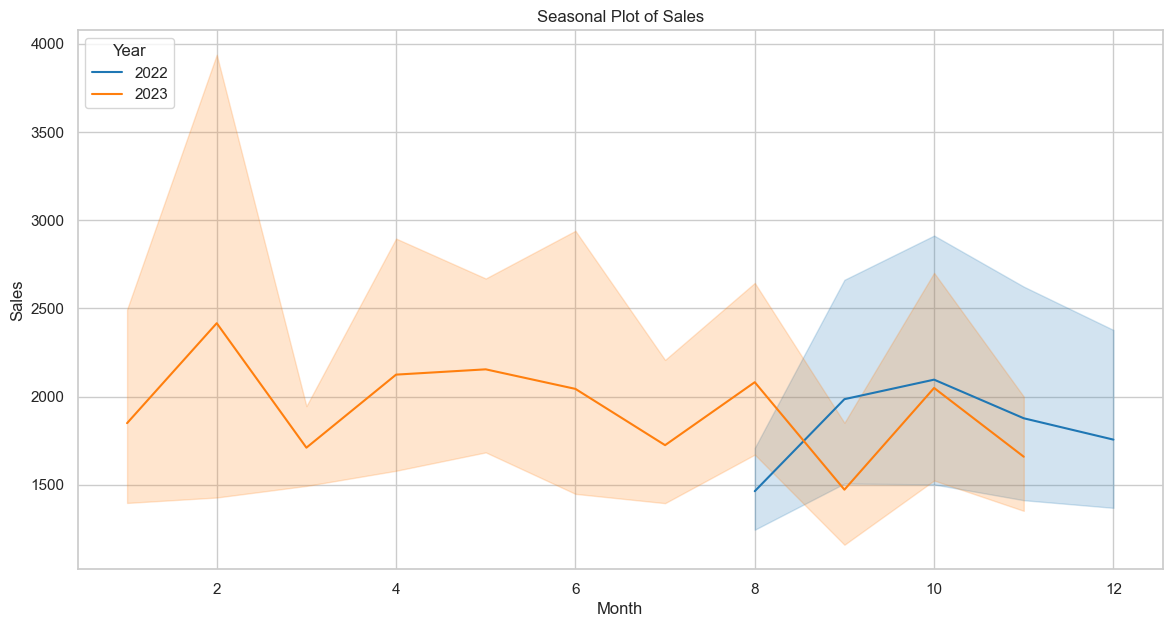

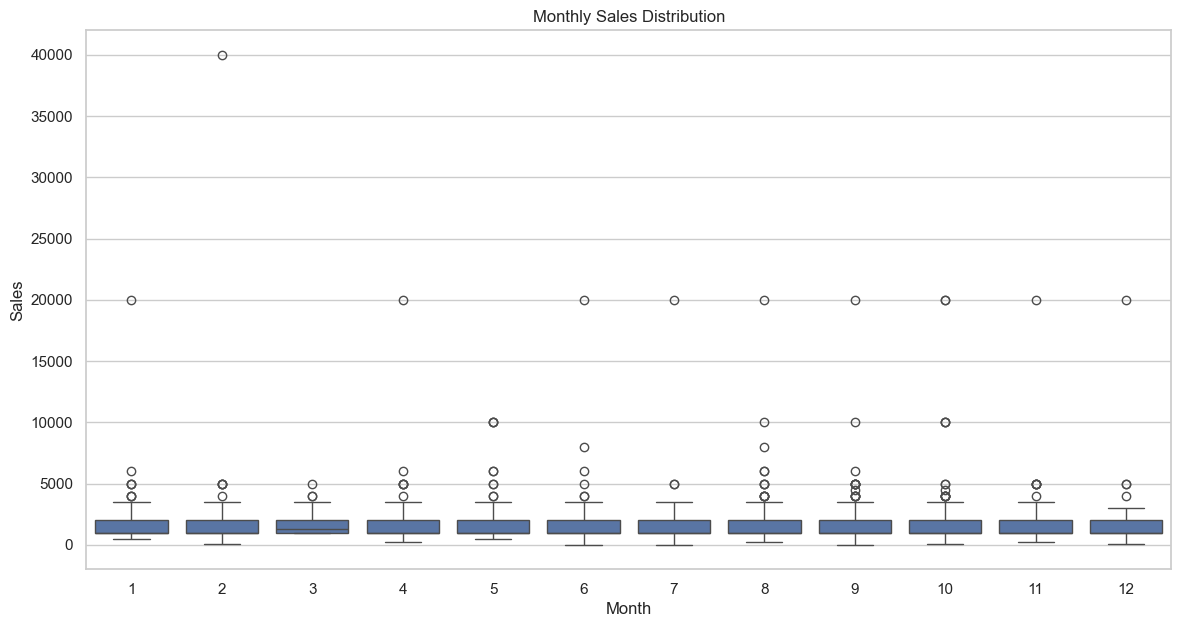

In [ ]:
# Visualize the Data

# Line plot of the entire dataset
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['sales'], label='Sales')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Seasonal plot to visualize seasonality
sns.set(style="whitegrid")
df['month'] = df.index.month
df['year'] = df.index.year

plt.figure(figsize=(14, 7))
sns.lineplot(x='month', y='sales', hue='year', data=df, palette='tab10')
plt.title('Seasonal Plot of Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Year', loc='upper left')
plt.show()

# Boxplot to visualize monthly sales distribution
plt.figure(figsize=(14, 7))
sns.boxplot(x='month', y='sales', data=df)
plt.title('Monthly Sales Distribution')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

# Remove the temporary columns
df.drop(columns=['month', 'year'], inplace=True)

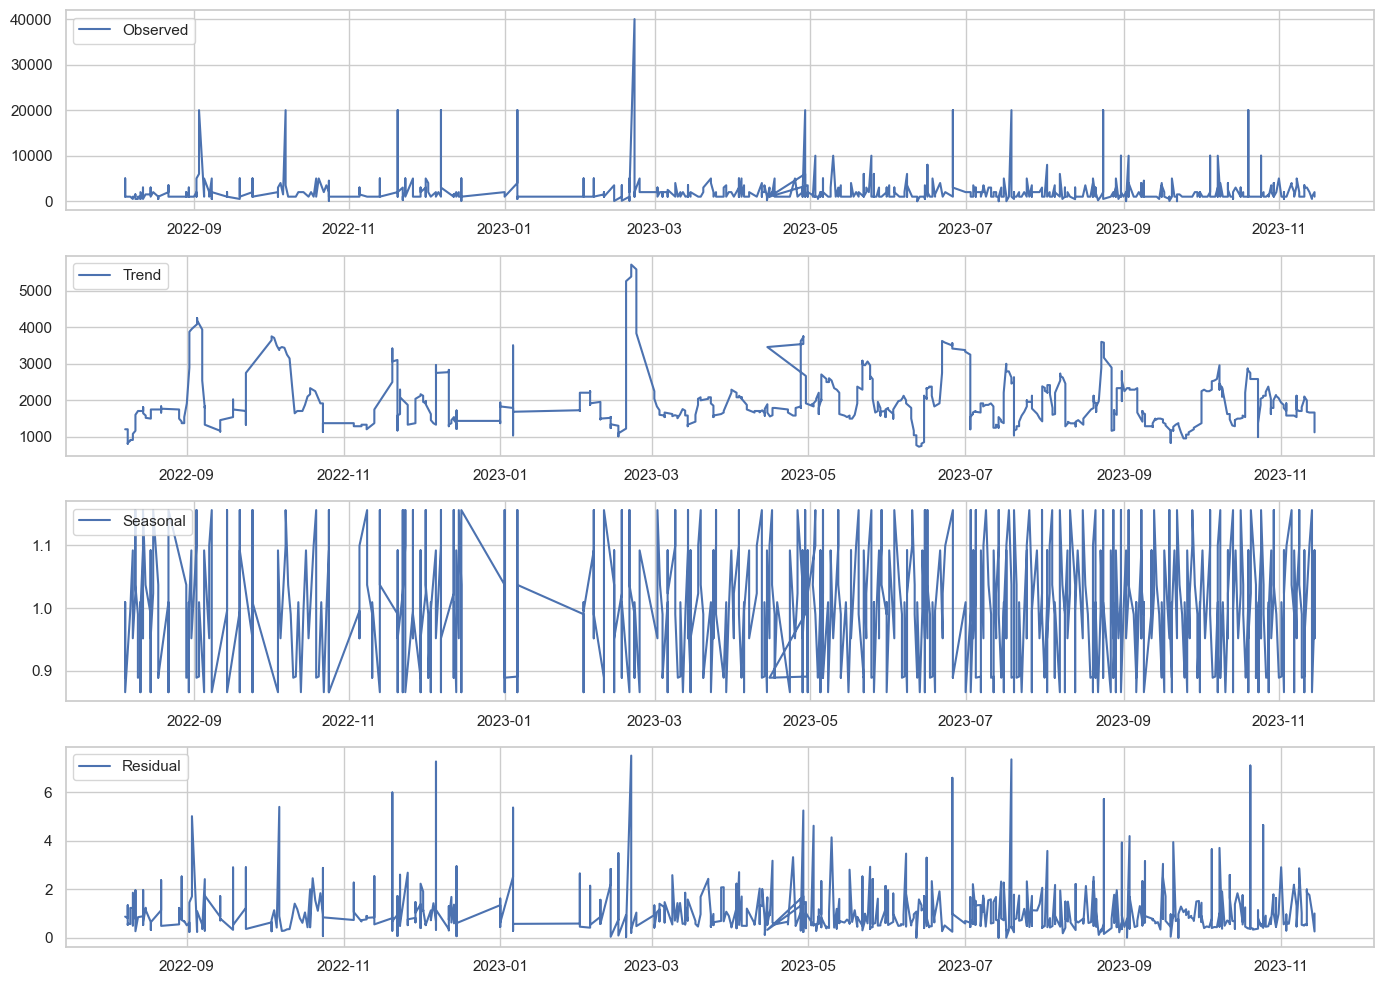

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df['sales'], model='multiplicative', period=12)

# Plot the decomposed components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(result.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Pengembangan Model

In [52]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the ETS model
ets_model = ExponentialSmoothing(df['sales'], trend='add', seasonal='add', seasonal_periods=12)
ets_fit = ets_model.fit()

# Display the model summary
print(ets_fit.summary())

c:\Users\anfiniti\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\anfiniti\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    sales   No. Observations:                 1076
Model:             ExponentialSmoothing   SSE                     7091405920.942
Optimized:                         True   AIC                          16926.431
Trend:                         Additive   BIC                          17006.127
Seasonal:                      Additive   AICC                         16927.078
Seasonal Periods:                    12   Date:                 Mon, 04 Nov 2024
Box-Cox:                          False   Time:                         21:14:51
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0403571                alpha                 True
smoothing_trend          

c:\Users\anfiniti\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


c:\Users\anfiniti\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\anfiniti\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\anfiniti\AppData\Local\Temp\ipykernel_102176\803572865.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_df = pd.DataFrame(forecast.values, index=pd.date_range(start=df.index[-1] + pd.DateOffset(1), periods=24, freq='M'), columns=['forecast'])


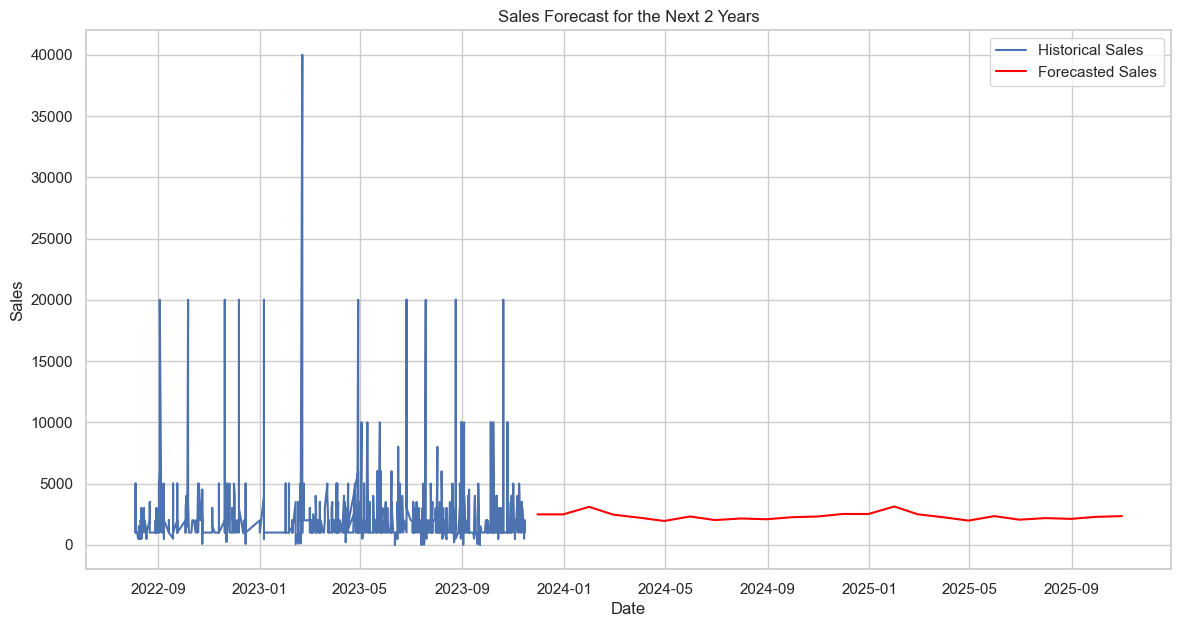

In [84]:
# Forecast for the Next 2 Years

# Generate forecast for the next 2 years (24 months)
forecast = ets_fit.forecast(steps=24)

# Create a DataFrame to hold the forecasted values
forecast_df = pd.DataFrame(forecast.values, index=pd.date_range(start=df.index[-1] + pd.DateOffset(1), periods=24, freq='M'), columns=['forecast'])

# Plot the forecasted values along with the historical data
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['sales'], label='Historical Sales')
plt.plot(forecast_df.index, forecast, label='Forecasted Sales', color='red')
plt.title('Sales Forecast for the Next 2 Years')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Evaluasi Model

c:\Users\anfiniti\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\anfiniti\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\anfiniti\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\anfiniti\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ret

Mean Absolute Error (MAE): 1617.136143142263
Mean Squared Error (MSE): 4932587.801869772
Root Mean Squared Error (RMSE): 2220.9429983387176


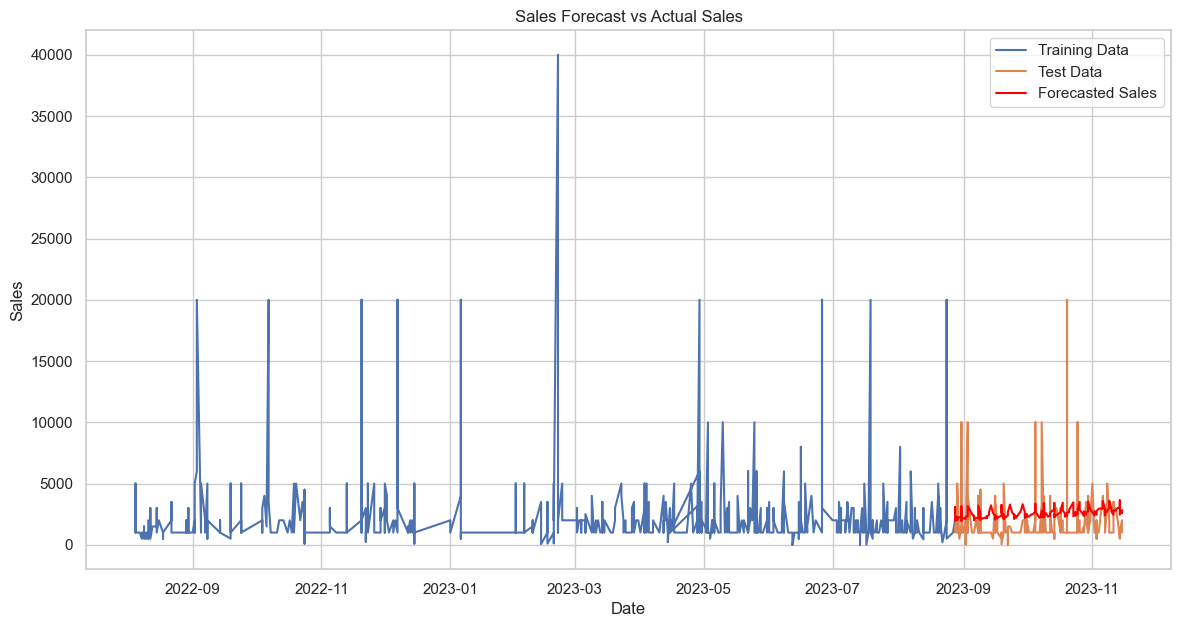

In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Split the data into training and test sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Fit the model on the training data
ets_model = ExponentialSmoothing(train['sales'], trend='add', seasonal='add', seasonal_periods=12)
ets_fit = ets_model.fit()

# Generate forecast on the test data
test_forecast = ets_fit.forecast(steps=len(test))

# Calculate evaluation metrics
mae = mean_absolute_error(test['sales'], test_forecast)
mse = mean_squared_error(test['sales'], test_forecast)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plot the forecasted values against the actual values
plt.figure(figsize=(14, 7))
plt.plot(train.index, train['sales'], label='Training Data')
plt.plot(test.index, test['sales'], label='Test Data')
plt.plot(test.index, test_forecast, label='Forecasted Sales', color='red')
plt.title('Sales Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()